In [1]:
import numpy as np
import os
import h5py
import copy
from scipy.interpolate import interp2d
from PIL import Image

import lenstronomy.Util.kernel_util as kernel_util
import lenstronomy.Util.util as util
# from astroObjectAnalyser.DataAnalysis.analysis import Analysis
# from astroObjectAnalyser.astro_object_superclass import StrongLensSystem
from paperfig import *

In [2]:
import matplotlib as mpl
%matplotlib inline

# for MNRAS
mpl.rcParams['ps.fonttype'] = 42

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid, make_axes_locatable
import matplotlib.image as mpimg
import seaborn as sns
import coloripy as cp

# to change tex to Times New Roman in mpl
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['mathtext.it'] = 'serif:italic'
plt.rcParams['mathtext.bf'] = 'serif:bold'
plt.rcParams['mathtext.fontset'] = 'custom'


sns.set(style='ticks', context='paper', font='Times New Roman', font_scale=2.) #2
#sns.set_context('talk')
sns.set_style({"xtick.direction": "in","ytick.direction": "in", "axes.linewidth": 2.0,})
#sns.set_palette('Set2')

cmap = sns.cubehelix_palette(start=0.5, rot=-1.5, gamma=1, hue=1, light=0., dark=1., reverse=False, as_cmap=True)
msh_cmap = cp.get_msh_cmap(num_bins=501, rescale='power', power=2.5)

In [3]:
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord

from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u

from astropy.io import fits
from astropy.stats import SigmaClip
from photutils.background import Background2D, MedianBackground

from rgb_functions import *

/home/rmbrady/miniconda3/envs/dolphin/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
def load_quasar_cutouts(system_name, ra_str, dec_str):

    width = 6

# coords = ["1:12:43.2 +31:12:43", "1 12 43.2 +31 12 43"]
# c = SkyCoord(coords, frame=FK4, unit=(u.hourangle, u.deg), obstime="J1992.21")

    sky_coord = SkyCoord(f'{ra_str} {dec_str}', frame=FK5, unit=(u.hourangle, u.deg))
    print(sky_coord)

# options for cutout
    num_pixs = [200, 750, 750]

# system = StrongLensSystem(system_name)
# system.add_info_attribute('ra_str', ra_str)
# system.add_info_attribute('dec_str', dec_str)

    image_names = ['F160W', 'F814W', 'F475X']
    image_filenames = [
        f'../../reduced_data/{system_name}_reduced/{image_names[0]}/{system_name}_F160W_drz_sci.fits',
        f'../../reduced_data/{system_name}_reduced/{image_names[1]}/{system_name}_F814W_drc_sci.fits',
        f'../../reduced_data/{system_name}_reduced/{image_names[2]}/{system_name}_F475X_drc_sci.fits',
        ]

    cwd = os.getcwd()
    base_path, _ = os.path.split(cwd)
    print(base_path)


    data_cutouts = []


    for image_name, image_filename, num_pix in zip(image_names, image_filenames, num_pixs):
        # import the data
        local_filename = image_filename

        data, header = fits.getdata(local_filename, header=True)
    
        wcs = WCS(header)
#     print(wcs)
        sigma_clip = SigmaClip(sigma=3.0)
        bkg_estimator = MedianBackground()
        bkg = Background2D(data, (50, 50), filter_size=(3, 3),
                       sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)

        background_subtracted_data = data - bkg.background
    
#     plt.matshow(np.log10(background_subtracted_data), origin='lower')
#     plt.show()
    
        cutout = Cutout2D(background_subtracted_data, 
                      sky_coord,
                      [width*u.arcsec, width*u.arcsec],
                      wcs
                     )
#     print(cutout.shape)
    
        data_cutouts.append(cutout.data)
    
        #plt.matshow(np.log10(cutout.data), origin='lower')
        #plt.show()
    return data_cutouts

In [5]:
quasars = {
    'J0407-5006': ['04:07:10.26', '-50:06:02.00'],
    'J0602-4335': ['06:02:16.08', '-43:35:40.10'],
    'J0806+2006': ['08:06:23.67', '20:06:31.20'],
    'J1001+5027': ['10:01:28.44', '50:27:57.43'],
    'J1442+4055': ['14:42:54.70', '40:55:35.06'],
    'J1515+1511': ['15:15:38.52', '15:11:35.26'],
    'J1620+1203': ['16:20:26.23', '12:03:40.55'],
    'J2325-5229': ['23:25:41.20', '-52:29:15.16']
}

data_list = []
name_list = []

for name, (ra_str, dec_str) in quasars.items():
    data_cutouts = load_quasar_cutouts(name, ra_str, dec_str)

    data_list.append(data_cutouts)
    name_list.append(name)


<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (61.79275, -50.10055556)>
/home/rmbrady


<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (90.567, -43.59447222)>
/home/rmbrady


<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (121.598625, 20.10866667)>
/home/rmbrady


<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (150.3685, 50.46595278)>
/home/rmbrady


<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (220.72791667, 40.92640556)>
/home/rmbrady


<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (228.9105, 15.19312778)>
/home/rmbrady


<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (245.10929167, 12.06126389)>
/home/rmbrady


<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (351.42166667, -52.48754444)>
/home/rmbrady


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

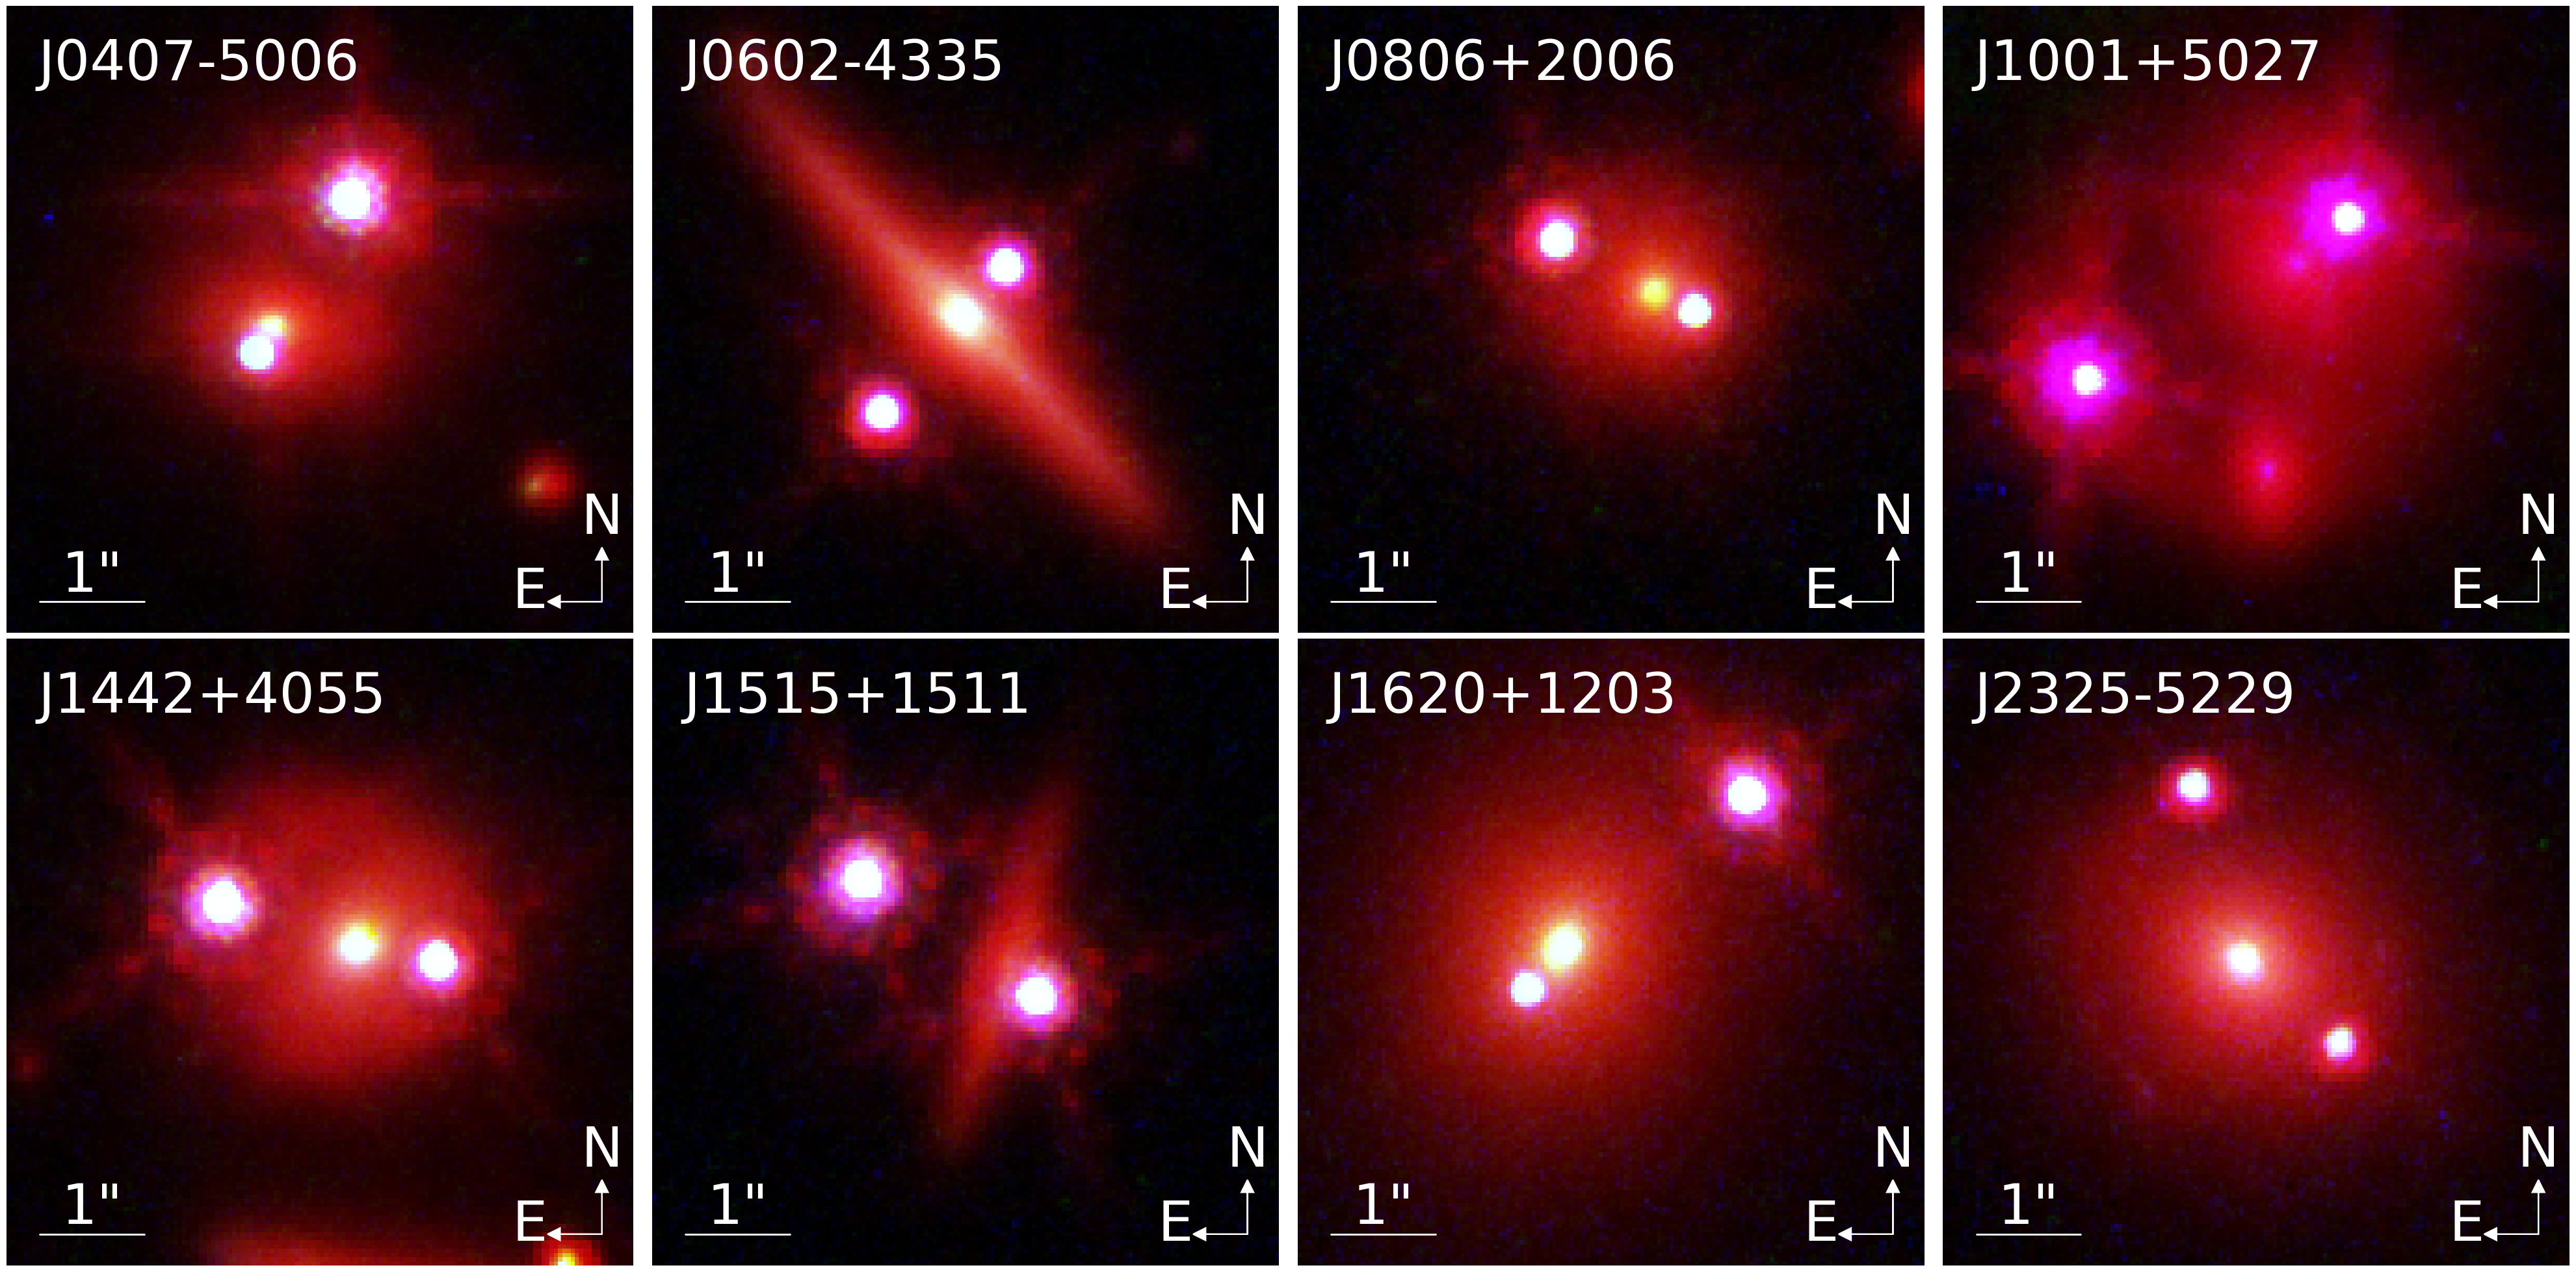

In [16]:
weight_list = [[1., .5, .3],
               [1., .5, .3],
               [1., .5, .3],
               [1., .5, .3],
               [1., .5, .3],
               [1., .5, .3],
               [1., .4, .2],
               [1., .5, .15]
]

plot_quasar_grid(data_list, names=name_list, fontsize=62, weights=weight_list, size=(40, 20))

In [ ]:
system_name = 'J1620+1203'

ra_str = '16:20:26.23'
dec_str = '12:03:40.55'

width = 6

# coords = ["1:12:43.2 +31:12:43", "1 12 43.2 +31 12 43"]
# c = SkyCoord(coords, frame=FK4, unit=(u.hourangle, u.deg), obstime="J1992.21")

sky_coord = SkyCoord(f'{ra_str} {dec_str}', frame=FK5, unit=(u.hourangle, u.deg))
print(sky_coord)

# options for cutout
num_pixs = [200, 750, 750]

# system = StrongLensSystem(system_name)
# system.add_info_attribute('ra_str', ra_str)
# system.add_info_attribute('dec_str', dec_str)

image_names = ['F160W', 'F814W', 'F475X']
image_filenames = [
        f'../../reduced_data/{system_name}_reduced/{image_names[0]}/{system_name}_F160W_drz_sci.fits',
        f'../../reduced_data/{system_name}_reduced/{image_names[1]}/{system_name}_F814W_drc_sci.fits',
        f'../../reduced_data/{system_name}_reduced/{image_names[2]}/{system_name}_F475X_drc_sci.fits',
        ]

cwd = os.getcwd()
base_path, _ = os.path.split(cwd)
print(base_path)


data_cutouts = []


for image_name, image_filename, num_pix in zip(image_names, image_filenames, num_pixs):
    # import the data
    local_filename = image_filename
    
    data, header = fits.getdata(local_filename, header=True)
    
    wcs = WCS(header)
#     print(wcs)
    sigma_clip = SigmaClip(sigma=3.0)
    bkg_estimator = MedianBackground()
    bkg = Background2D(data, (50, 50), filter_size=(3, 3),
                       sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)

    background_subtracted_data = data - bkg.background
    
#     plt.matshow(np.log10(background_subtracted_data), origin='lower')
#     plt.show()
    
    cutout = Cutout2D(background_subtracted_data, 
                      sky_coord,
                      [10*u.arcsec, 10*u.arcsec],
                      wcs
                     )
#     print(cutout.shape)
    
    data_cutouts.append(cutout.data)
    
    #plt.matshow(np.log10(cutout.data), origin='lower')
    #plt.show()

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (245.10929167, 12.06126389)>
/home/rmbrady


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


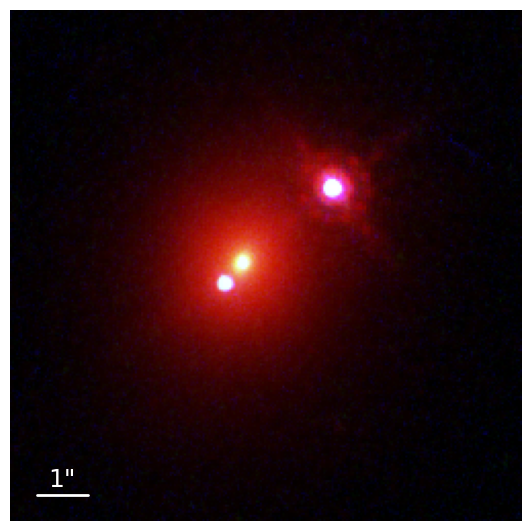

In [11]:
from matplotlib.patches import Circle

fig = plt.figure(figsize=get_fig_size(mnras_colwidth*2, height_ratio=1))
ax = fig.add_subplot(111)

fontsize = mnras_text_fontsize*2

set_fontscale(4, font='Times New Roman')

make_rgb_image(r'WGD 2038-4008', data_cutouts, 
               ax, 
               weights=[1., .5, .3],
               ruler_length=1, fontsize=fontsize
              )
    
#add_arrows(ax, fontsize=fontsize)
# add_arrows(ax,)